In [0]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import mixture
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.linalg as scln
from scipy.linalg import inv
from scipy.stats import multivariate_normal as mvn
from sklearn.model_selection import KFold
from sklearn.svm import SVC
#r=mvn.rvs(mean=mu,cov=cov,size=400)
%matplotlib inline

In [0]:
path=r'/content/EECE5644_2019Fall_Homework4Questions_3096_colorPlane.jpg'

In [0]:
img=plt.imread(path)

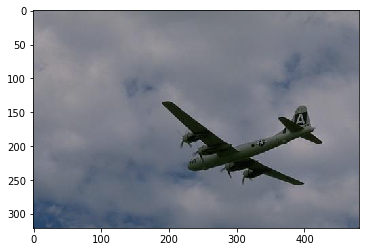

In [0]:
plt.imshow(img)
plt.show()

In [0]:

# features vector 
def function1(img):
  imagepic=[]
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      imagepic.append([i, j] +list(img[i][j]))
  x=np.asarray(imagepic)
  x.dtype = 'float64'
  return x

In [0]:

# performing column wise normalization.
x=function1(img)
for i in range(5):
  x[:,i]=(x[:,i]-min(x[:,i]))/float(max(x[:,i])-min(x[:,i]))

In [0]:
# k values given according to the question.

k=[2,3,4,5]

In [0]:

# function to plot after performing the k means clustering of the image.
def plot(i): 
  kmeans = KMeans(n_clusters=k[i]).fit(x)
  y = kmeans.labels_.reshape(321,481)
  plt.imshow(y)

plots for different values of k performing k means clustering 

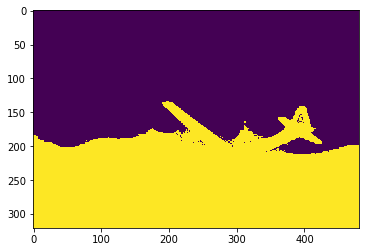

In [0]:
plot(0)

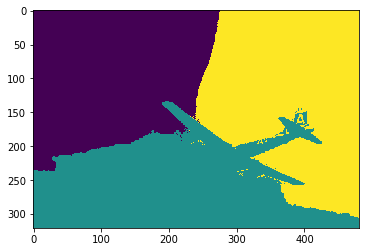

In [0]:
plot(1)

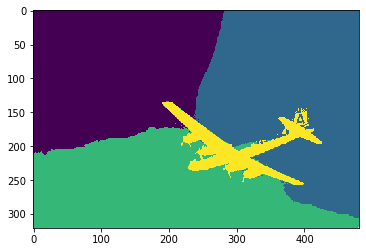

In [0]:
plot(2)

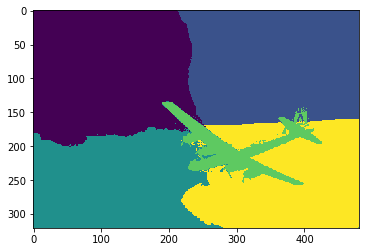

In [0]:
plot(3)

GMM


In [0]:
def plot1(i):
   
  gmm = mixture.GaussianMixture(n_components=k[i],covariance_type="full")
  gmm.fit(x)
  y=gmm.predict(x).reshape(321,481)
  plt.imshow(y)

plots for different values of k performing gmm 

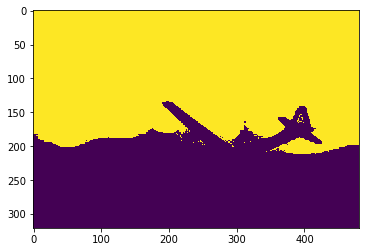

In [0]:
plot(0)

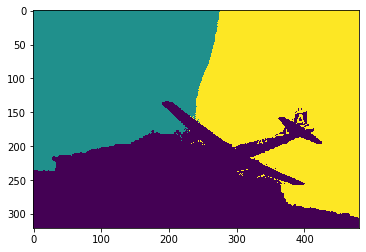

In [0]:
plot(1)

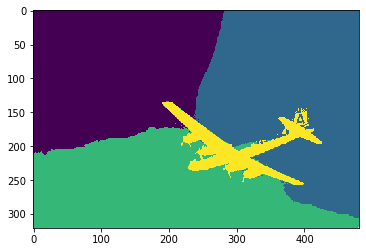

In [0]:
plot(2)

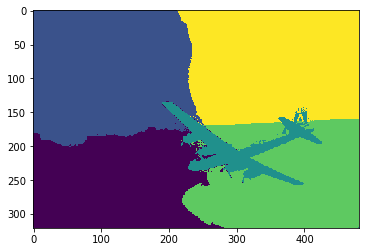

In [0]:
plot(3)

performing k means clustering and gmm for the second image given in the question 

In [0]:
# importing the image 
path1='/content/EECE5644_2019Fall_Homework4Questions_42049_colorBird.jpg'

In [0]:
img1=plt.imread(path1)

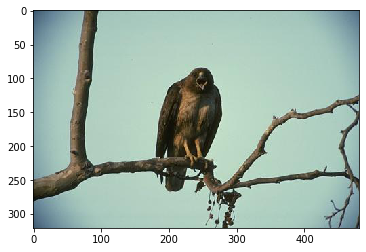

In [0]:
plt.imshow(img1)
plt.show()

In [0]:
# performing column wise normalization 

x=function1(img1)
for i in range(5):
  x[:,i]=(x[:,i]-min(x[:,i]))/float(max(x[:,i])-min(x[:,i]))

In [0]:
# function to plot after performing the k means clustering of the image.
def plot(i): 
  kmeans = KMeans(n_clusters=k[i]).fit(x)
  y = kmeans.labels_.reshape(321,481)
  plt.imshow(y)

plots performing showing the k means clustering 

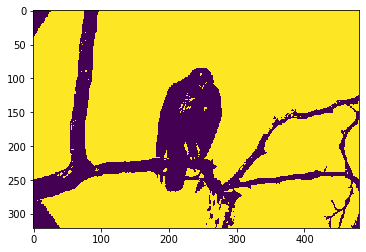

In [0]:
plot(0)

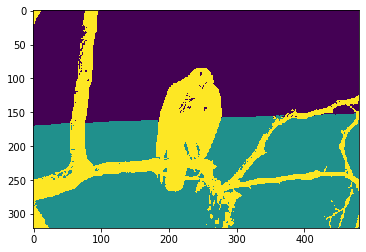

In [0]:
plot(1)

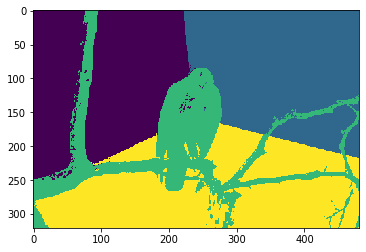

In [0]:
plot(2)

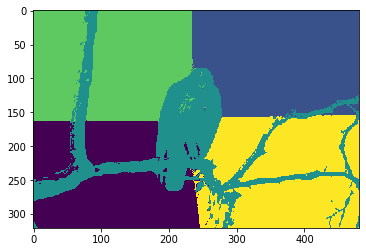

In [0]:
plot(3)

Gmm for image 2

In [0]:
def plot1(i):
   
  gmm = mixture.GaussianMixture(n_components=k[i],covariance_type="full")
  gmm.fit(x)
  y=gmm.predict(x).reshape(321,481)
  plt.imshow(y)

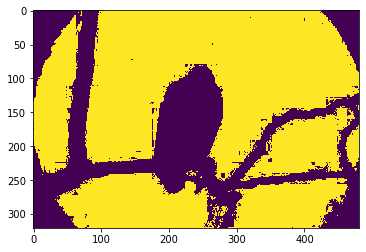

In [0]:
plot1(0)

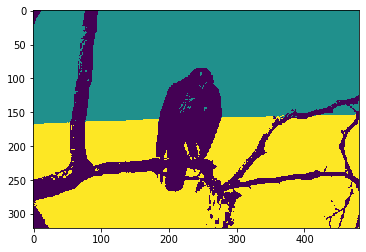

In [0]:
plot(1)

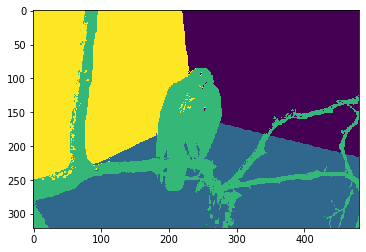

In [0]:
plot(2)

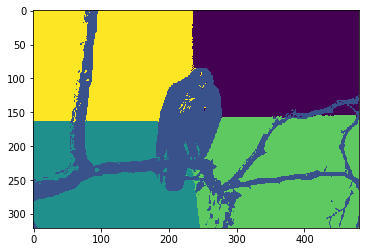

In [0]:
plot(3)

Question 2

In [0]:
# random genration of samples 

def samplegenerator(size,p):
  t=0
  b=np.random.choice(2,size,p=[p[0],p[1]])
  for i in b:
    if i==1:
      t=t+1
  size1=[size-t,t]
  return size1

In [0]:
# given probability according to the question

p=[0.35,0.65]

In [0]:
size=1000
x=samplegenerator(1000,p)
mean1=[0,0]
cov1=np.array([[1,0],[0,1]])
#first multivariate  normal distribution  =describes according to the question 

r1= np.random.multivariate_normal(mean1, cov1, x[0])
# uniform distribution of the radius given according to the question
r=np.random.uniform(low=2,high=3,size=x[1])
#generation of the points in the uniform distribution with -pi as the lowe =r limit and + pi as the upper limit 
r2=np.random.uniform(low=-np.pi,high=np.pi,size=x[1])
#converstion of the polar coordinates to cartisen coordinates 
x=r*np.cos(r2)
x.reshape(x.shape[0],1)
ym=r*np.sin(r2)
ym.reshape(ym.shape[0],1)
z = np.column_stack((x,ym))

In [0]:
def plot(r1,r2):
  plt.figure(figsize=(7,7))
  plt.scatter(r1[:,0],r1[:,1],label='class1',color='blue')
  plt.scatter(z[:,0],z[:,1],label='class2',color='green')
  plt.axis('equal')
  plt.title(' multi variate normal distribution curves of the  priors')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.legend(loc='upper left')
  plt.show()
  

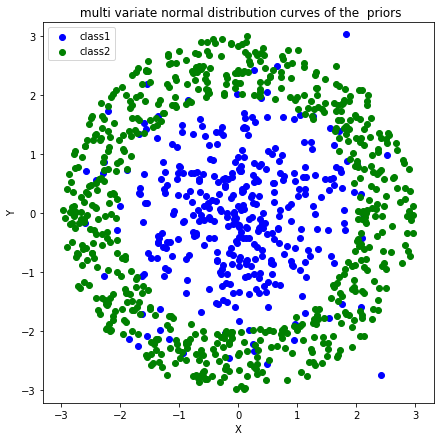

In [83]:
plot(r1,z)

part2

In [0]:
X=np.concatenate((r1,z),axis=0)
y1=np.ones(r1.shape[0])
y2=np.zeros(z.shape[0])
y=np.concatenate((y1,y2),axis=0)


 Performing the cross validation with c as the hyperparameter

In [0]:
loop=[10**i for i in range(-5,3,1)]

In [0]:
for i in loop:
  vs=[]
  ts=[]
  clf = SVC(C = i, kernel = 'linear')
  cv = KFold(n_splits=10, shuffle=True)
  for train_index, test_index in cv.split(X):
      X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
      clf.fit(X_train, y_train)
      b=clf.predict(X_test)
      vs.append(b)
      c=clf.predict(X_train)
      ts.append(c)


count counts number of errors in the testset

In [0]:
k=[]
for n in range (len(vs)):
  count=0
  for i in range (y_test.shape[0]):
    if vs[n][i]!=y_test[i]:
      count=count+1
  k.append(count)

count1 counts number of errors in the trainset

In [0]:
v=[]
for n in range(len(ts)):
  count1=0
  for i in range(y_train.shape[0]):
    if ts[n][i]!=y_train[i]:
      count1=count1+1
  v.append(count1)  

In [89]:
k

[33, 33, 33, 33, 33, 33, 33, 33, 33, 33]

In [90]:
v

[325, 325, 325, 325, 325, 325, 325, 325, 325, 325]

Text(0.5, 1.0, ' Probability of errors vs C-values for a Linear SVM classifier')

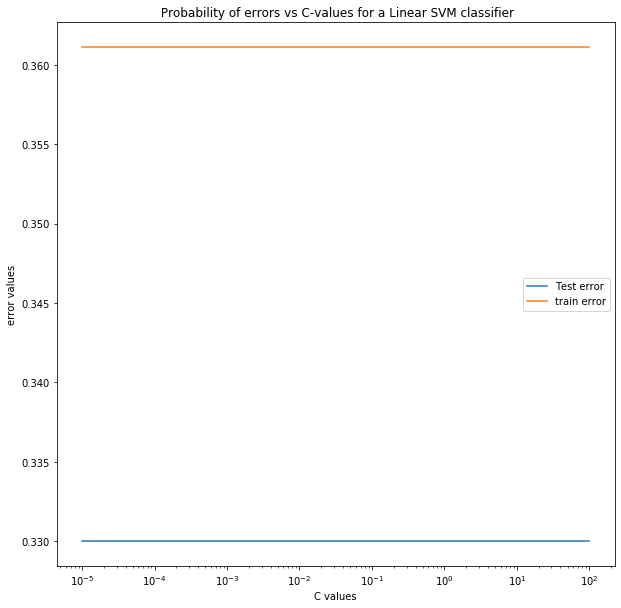

In [91]:
plt.figure(figsize=(10,10))
plt.plot(loop,np.array(k[:8])/100,label="Test error")
plt.plot(loop,np.array(v[:8])/900,label="train error")
plt.legend()
plt.xscale('log')
plt.xlabel("C values")
plt.ylabel("error values")
plt.title(" Probability of errors vs C-values for a Linear SVM classifier")

as the probability of error is constant for all the c values i have taken c value to be as 1 for **train dataset**

In [92]:
clf = SVC(C = 1, kernel = 'linear')
clf.fit(X,y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

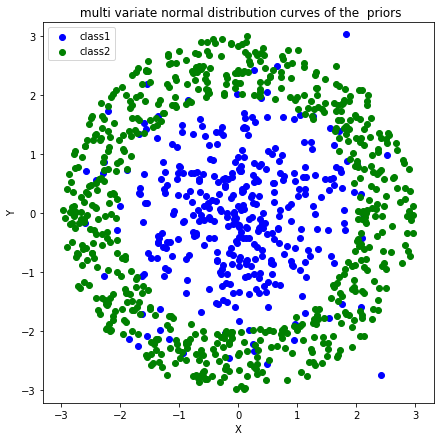

In [93]:
plot(r1,z)

In [0]:
pred_rbf=clf.predict(X)

In [0]:
a0_0=X[((y==0) & (pred_rbf==0))]
a0_1=X[((y==0) & (pred_rbf==1))]
a1_0=X[((y==1) & (pred_rbf==0))]
a1_1=X[((y==1) & (pred_rbf==1))]


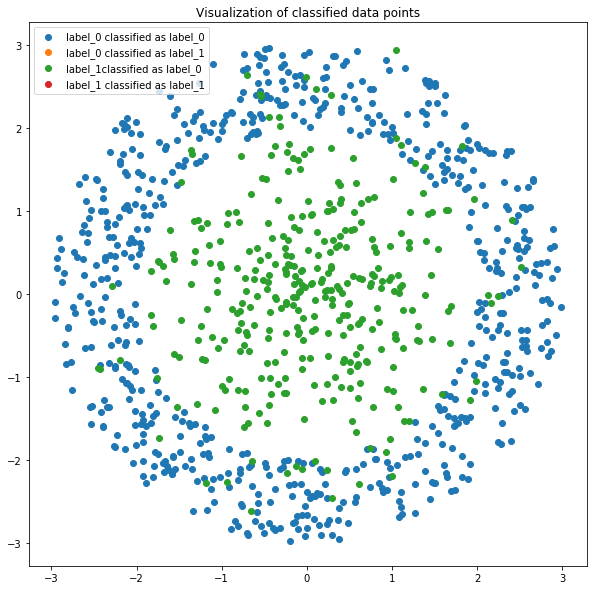

In [0]:
plt.figure(figsize=(10,10))

plt.scatter(a0_0.T[0,:],a0_0.T[1,:],label='label_0 classified as label_0')
plt.scatter(a0_1.T[0,:],a0_1.T[1,:],label='label_0 classified as label_1')
plt.scatter(a1_0.T[0,:],a1_0.T[1,:],label='label_1classified as label_0')
plt.scatter(a1_1.T[0,:],a1_1.T[1,:],label='label_1 classified as label_1')
plt.title('Visualization of classified data points')
plt.legend()

as the probability of error is constant for all the c values i have taken c value to be as 1 for **test dataset**

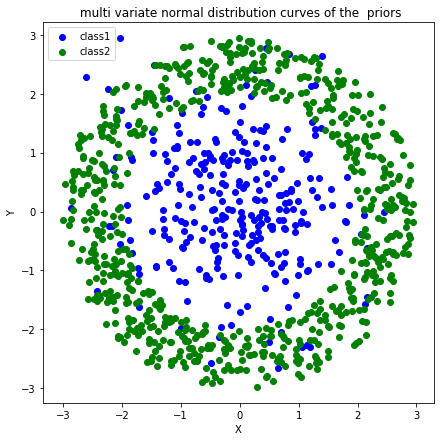

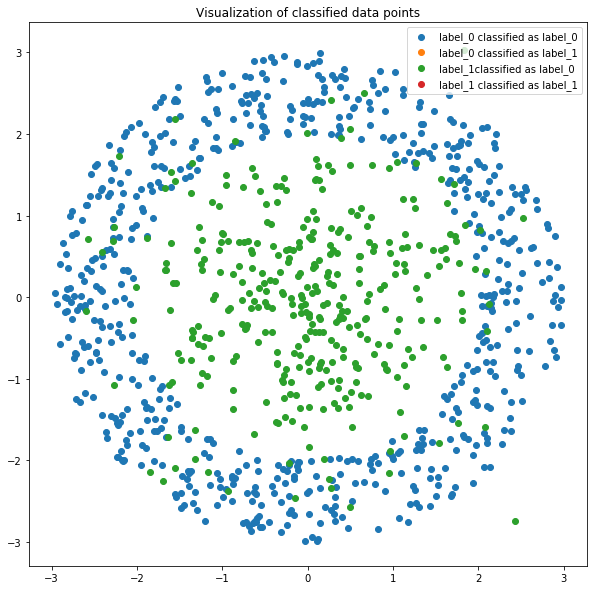

In [94]:
# generating new test datapoints for test set
size=1000
x=samplegenerator(1000,p)
mean1=[0,0]
cov1=np.array([[1,0],[0,1]])
#first multivariate  normal distribution  =describes according to the question 

r1= np.random.multivariate_normal(mean1, cov1, x[0])
# uniform distribution of the radius given according to the question
r=np.random.uniform(low=2,high=3,size=x[1])
#generation of the points in the uniform distribution with -pi as the lowe =r limit and + pi as the upper limit 
r2=np.random.uniform(low=-np.pi,high=np.pi,size=x[1])
#converstion of the polar coordinates to cartisen coordinates 
x=r*np.cos(r2)
x.reshape(x.shape[0],1)
ym=r*np.sin(r2)
ym.reshape(ym.shape[0],1)
z = np.column_stack((x,ym))

plot(r1,z)

X_test=np.concatenate((r1,z),axis=0)
y1_test=np.ones(r1.shape[0])
y2_test=np.zeros(z.shape[0])
y_test=np.concatenate((y1,y2),axis=0)
pred_rbf=clf.predict(X_test)

a0_0=X[((y==0) & (pred_rbf==0))]
a0_1=X[((y==0) & (pred_rbf==1))]
a1_0=X[((y==1) & (pred_rbf==0))]
a1_1=X[((y==1) & (pred_rbf==1))]

plt.figure(figsize=(10,10))

plt.scatter(a0_0.T[0,:],a0_0.T[1,:],label='label_0 classified as label_0')
plt.scatter(a0_1.T[0,:],a0_1.T[1,:],label='label_0 classified as label_1')
plt.scatter(a1_0.T[0,:],a1_0.T[1,:],label='label_1classified as label_0')
plt.scatter(a1_1.T[0,:],a1_1.T[1,:],label='label_1 classified as label_1')
plt.title('Visualization of classified data points')
plt.legend()


classification of samples in the test set for linear svm

In [95]:
print(a0_0.shape[0]) # number of samples of label 1 classified as class 1
print(a0_1.shape[0]) #number of samples of label2 classified as class 2
print(a1_0.shape[0])# number of samples of label 2 classified as class 1
print(a1_1.shape[0])# number of samples of label 2 classified as class 2

642
0
358
0


RBF KERNEL SVM WITH HYPERMATERS

In [0]:
loop1=[10**i for i in range(-5,5,1)]
loop=[10**i for i in range(-4,5,1)]

In [0]:

def functioncall(loop1,loop,X,flag):
    o=[]
    for j in loop1: # loop1 refers to the range of values for gamma
      n=[]
      for i in loop: # loop refers to the range of values for C
        vs=[]
        clf = SVC(C = i, kernel = 'rbf',gamma=j)
        cv = KFold(n_splits=10, shuffle=True)
        for train_index, test_index in cv.split(X):
            X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
            clf.fit(X_train, y_train)
            if flag == 1:
              b=clf.predict(X_test)
            else:
              b=clf.predict(X_train)
            vs.append(b)
        n.append(vs)
      o.append(n)
    if flag == 1:
      return o,y_test
    else:
      return o , y_train


In [0]:
def blah(vs, y_test):
  k = []
  for n in range (len(vs)):
     count=0
     for i in range (0, len(vs[0])):
        if vs[n][i]!=y_test[i]:
           count=count+1
     k.append(count)
  return np.mean(k)

when flag =1 it is test dataset

In [0]:
k = []
flag = 1
o,y_t = functioncall(loop1,loop,X,flag)
for i in range(0,len(loop1)):
  for j in range(0,len(loop)):
    k.append(blah(o[i][j],y_t))

plotting the countour plot and found the minimum value of k where you get minimum probability of error for **test data set**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: The following kwargs were not used by contour: 'level'
  


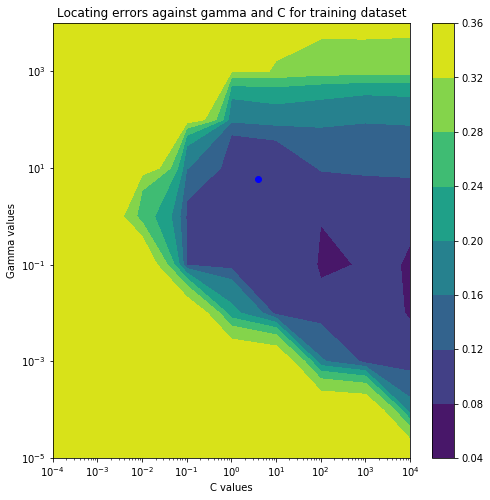

In [0]:
xx,yy=np.meshgrid(loop,loop1)
k = np.array(k)/100
k = k.reshape([len(loop1),len(loop)])
kminco = np.argmin(k)
xmin = kminco//(len(loop))
ymin = kminco%(len(loop))
plt.figure(num=1, figsize = (8,8))
plt.contourf(xx,yy,k,level=[50,60,70,80,90,100])
plt.plot(xmin,ymin,color='b',marker='o')
plt.xscale('log')
plt.yscale('log')
plt.colorbar()
plt.xlabel("C values")
plt.ylabel("Gamma values")
plt.title("Locating errors against gamma and C for training dataset")
plt.show()

when flag=0 then its train dataset 

In [0]:
k = []
flag = 0
o,y_t = functioncall(loop1,loop,X,flag)

for i in range(0,len(loop1)):
  for j in range(0,len(loop)):
    k.append(blah(o[i][j],y_t))


plotting the countour plot and found the minimum value of k where you get minimum probability of error for **train data set**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: The following kwargs were not used by contour: 'level'
  


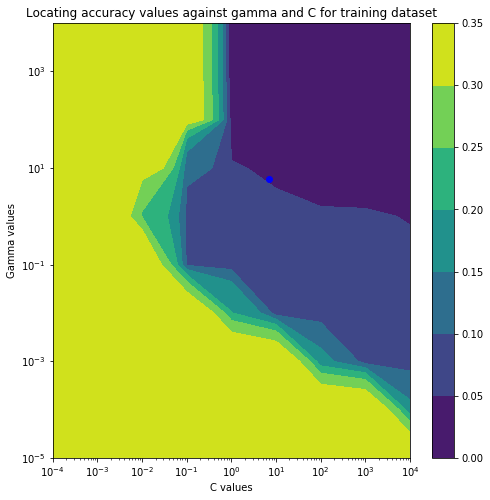

In [70]:
xx,yy=np.meshgrid(loop,loop1)
k = np.array(k)/900
k = k.reshape([len(loop1),len(loop)])
kminco = np.argmin(k)
xmin = kminco//(len(loop))
ymin = kminco%(len(loop))
plt.figure(num=1, figsize = (8,8))
plt.contourf(xx,yy,k,level=[50,60,70,80,90,100])
plt.plot(xmin,ymin,color='b',marker='o')
plt.xscale('log')
plt.yscale('log')
plt.colorbar()
plt.xlabel("C values")
plt.ylabel("Gamma values")
plt.title("Locating probability of error values against gamma and C for training dataset")
plt.show()

SVC CLASSIFIER OF TRAINDATASET

In [71]:
clf_rbf = SVC(C = 10, kernel = 'rbf',gamma=10)
clf_rbf.fit(X,y)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Generating 1000  independent random samples and checking our classifier 

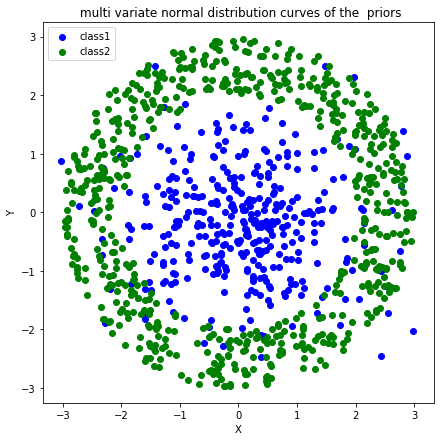

In [0]:
plot(r1,z)

In [0]:
pred_rbf=clf_rbf.predict(X)

In [0]:
a0_0=X[((y==0) & (pred_rbf==0))]
a0_1=X[((y==0) & (pred_rbf==1))]
a1_0=X[((y==1) & (pred_rbf==0))]
a1_1=X[((y==1) & (pred_rbf==1))]


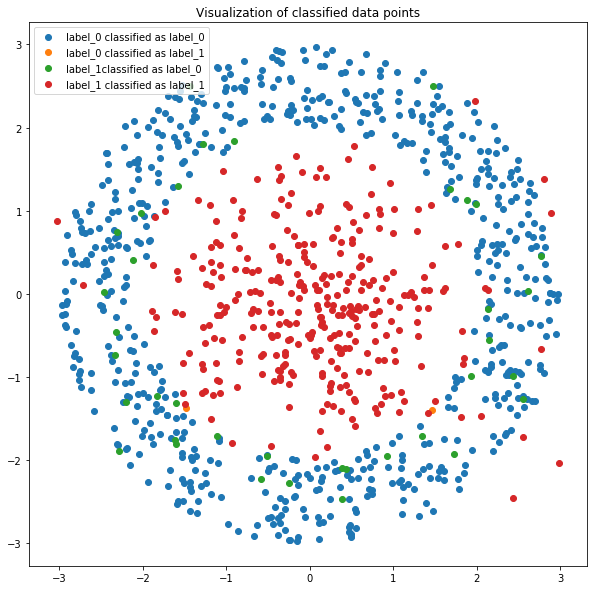

In [0]:
plt.figure(figsize=(10,10))

plt.scatter(a0_0.T[0,:],a0_0.T[1,:],label='label_0 classified as label_0')
plt.scatter(a0_1.T[0,:],a0_1.T[1,:],label='label_0 classified as label_1')
plt.scatter(a1_0.T[0,:],a1_0.T[1,:],label='label_1classified as label_0')
plt.scatter(a1_1.T[0,:],a1_1.T[1,:],label='label_1 classified as label_1')
plt.title('Visualization of classified data points')
plt.legend()

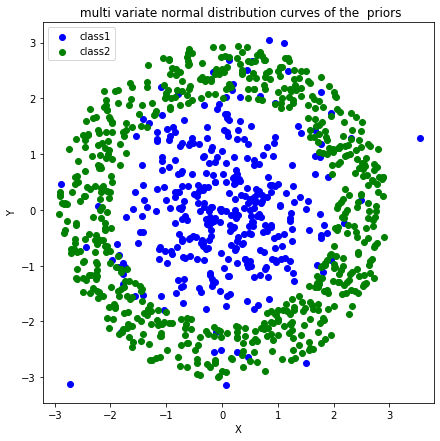

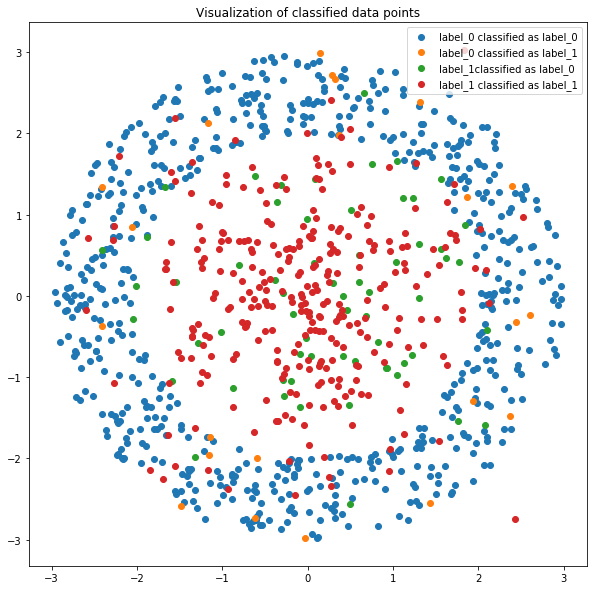

In [96]:

# generating new independent samples for test set for gaussian svm test

size=1000
x=samplegenerator(1000,p)
mean1=[0,0]
cov1=np.array([[1,0],[0,1]])
#first multivariate  normal distribution  =describes according to the question 

r1= np.random.multivariate_normal(mean1, cov1, x[0])
# uniform distribution of the radius given according to the question
r=np.random.uniform(low=2,high=3,size=x[1])
#generation of the points in the uniform distribution with -pi as the lowe =r limit and + pi as the upper limit 
r2=np.random.uniform(low=-np.pi,high=np.pi,size=x[1])
#converstion of the polar coordinates to cartisen coordinates 
x=r*np.cos(r2)
x.reshape(x.shape[0],1)
ym=r*np.sin(r2)
ym.reshape(ym.shape[0],1)
z = np.column_stack((x,ym))

plot(r1,z)


X_test=np.concatenate((r1,z),axis=0)
y1_test=np.ones(r1.shape[0])
y2_test=np.zeros(z.shape[0])
y_test=np.concatenate((y1,y2),axis=0)
pred_rbf=clf_rbf.predict(X_test)

a0_0=X[((y==0) & (pred_rbf==0))]
a0_1=X[((y==0) & (pred_rbf==1))]
a1_0=X[((y==1) & (pred_rbf==0))]
a1_1=X[((y==1) & (pred_rbf==1))]

plt.figure(figsize=(10,10))

plt.scatter(a0_0.T[0,:],a0_0.T[1,:],label='label_0 classified as label_0')
plt.scatter(a0_1.T[0,:],a0_1.T[1,:],label='label_0 classified as label_1')
plt.scatter(a1_0.T[0,:],a1_0.T[1,:],label='label_1classified as label_0')
plt.scatter(a1_1.T[0,:],a1_1.T[1,:],label='label_1 classified as label_1')
plt.title('Visualization of classified data points')
plt.legend()


In [100]:
print("number of samples of label 1 classified as class1   {}".format(a0_0.shape[0])) # number of samples of label 1 classified as class 1
print("number of samples of label1 classified as class 2   {}".format(a0_1.shape[0])) #number of samples of label1 classified as class 2
print("number of samples of label 2 classified as class 1  {}".format(a1_0.shape[0])) # number of samples of label 1 classified as class 1
print("number of samples of label 2 classified as class 2  {}".format(a1_1.shape[0])) #number of samples of label1 classified as class 2


number of samples of label 1 classified as class1   620
number of samples of label1 classified as class 2   22
number of samples of label 2 classified as class 1  62
number of samples of label 2 classified as class 2  296


from this we undersand that gaussian svm is better than linear svm as it could classify samples better